## Building a SVM model for Heart Attack Risk Detection Dataset

Libraries Used:
- matplotlib
- scikit-learn
- pandas
- numpy
- seaborn

## Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, hinge_loss
import matplotlib.pyplot as plt

## Importing Dataset

In [10]:
dataset_url = "./datasets/heart_attack_risk_dataset.csv"
data = pd.read_csv(dataset_url)

data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


## Inspecting Dataset

In [11]:
data.describe()

,Age,Smoking,Alcohol_Consumption,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Fasting_Blood_Sugar,Exercise_Induced_Angina,Max_Heart_Rate_Achieved
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,53.398700,0.298420,0.401980,27.519357,0.198840,0.29738,225.036444,134.434100,94.530480,0.30034,0.149360,0.201640,149.305340
std,20.799006,0.457569,0.490303,7.225176,0.399131,0.45711,43.317373,25.907961,20.187124,0.45841,0.356447,0.401229,28.823699
min,18.000000,0.000000,0.000000,15.000000,0.000000,0.00000,150.000000,90.000000,60.000000,0.00000,0.000000,0.000000,100.000000
25%,35.000000,0.000000,0.000000,21.270000,0.000000,0.00000,187.300000,112.000000,77.000000,0.00000,0.000000,0.000000,124.000000
50%,53.000000,0.000000,0.000000,27.540000,0.000000,0.00000,225.100000,134.000000,94.000000,0.00000,0.000000,0.000000,149.000000
75%,71.000000,1.000000,1.000000,33.770000,0.000000,1.00000,262.600000,157.000000,112.000000,1.00000,0.000000,0.000000,174.000000
max,89.000000,1.000000,1.000000,40.000000,1.000000,1.00000,300.000000,179.000000,129.000000,1.00000,1.000000,1.000000,199.000000


In [12]:
nominal_columns = ['Gender', 'Chest_Pain_Type', 'Thalassemia', 'ECG_Results']
ordinal_columns = ['Physical_Activity_Level', 'Stress_Level', 'Heart_Attack_Risk']

for col in nominal_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

severity_order = ['Low', 'Moderate', 'High']
for col in ordinal_columns:
    data[col] = pd.Categorical(data[col], categories=severity_order, ordered=True)
    data[col] = data[col].cat.codes
    
data.head()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,1,34.61,1,0,152.1,171,85,0,1,2,2,0,1,0,114,0
1,32,1,0,0,1,22.75,0,0,166.8,126,103,0,0,0,1,0,2,0,173,1
2,89,1,0,1,1,35.32,0,0,272.3,123,127,0,0,3,2,0,2,0,109,0
3,78,1,0,1,1,18.23,1,0,237.7,144,125,0,0,3,0,1,0,0,129,0
4,38,0,1,0,1,19.82,0,0,207.7,123,107,0,2,0,2,0,2,0,124,1


## Feature Correlation 

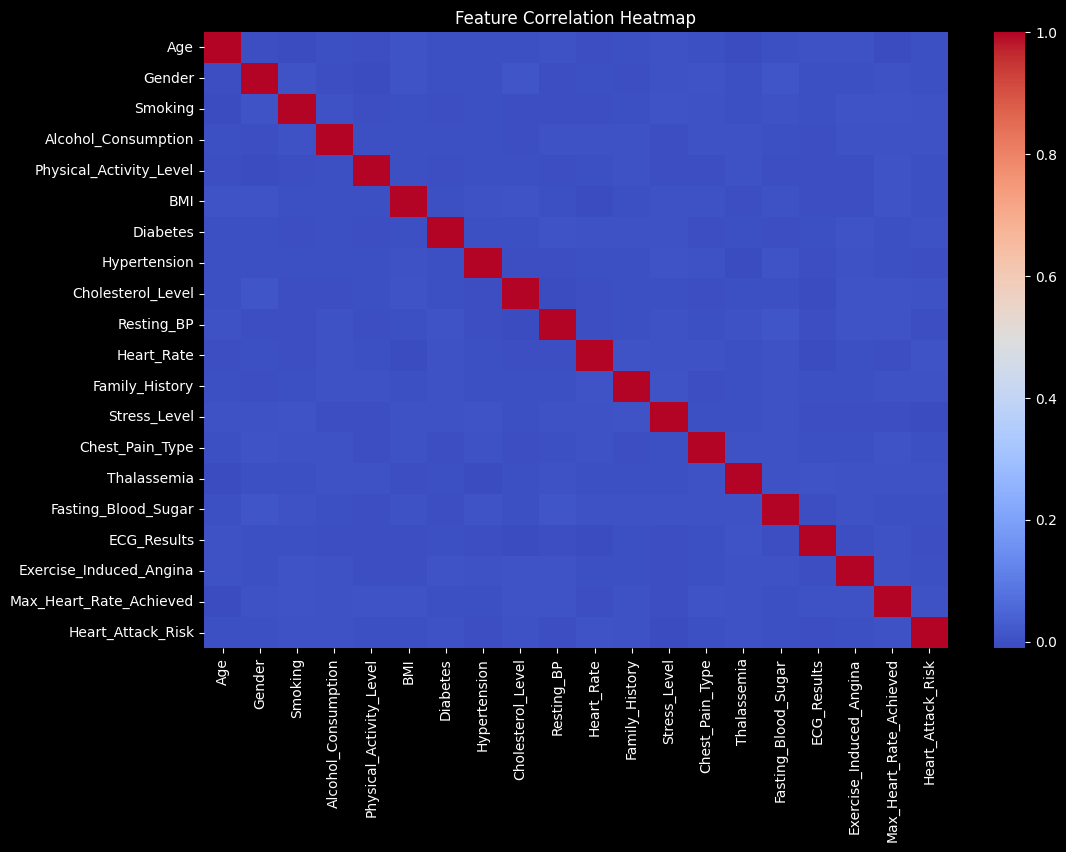

In [13]:
# Correlation heatmap
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


## Standardizing and Splitting Data 

In [14]:
# Separate features and target variable
X = data.drop('Heart_Attack_Risk', axis=1)
y = data['Heart_Attack_Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Training set size: 35000
Testing set size: 15000


## Model Training

In [15]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("Model training completed.")

Model training completed.


## Performing Predictions

Confusion Matrix:


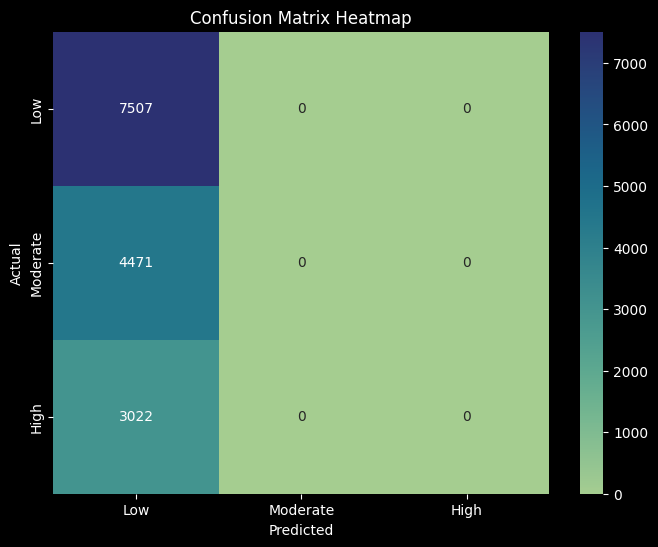


Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7507
           1       0.00      0.00      0.00      4471
           2       0.00      0.00      0.00      3022

    accuracy                           0.50     15000
   macro avg       0.17      0.33      0.22     15000
weighted avg       0.25      0.50      0.33     15000


Accuracy Score:
0.5004666666666666


In [16]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

# Confusion matrix heatmap
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("\nAccuracy Score:")
ac = accuracy_score(y_test, y_pred)
print(ac)

## Calculating Loss and Accuracy for Training and Prediction 

In [17]:
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training model for 5 epochs
for epoch in range(1, 6):
    svm_model.fit(X_train_scaled, y_train)

    # Computing training metrics
    train_preds = svm_model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_preds) * 100

    # Computing validation metrics
    val_preds = svm_model.predict(X_test_scaled)
    val_acc = accuracy_score(y_test, val_preds) * 100

    # Calculate training loss
    train_decision = svm_model.decision_function(X_train_scaled)
    train_loss = hinge_loss(y_train, train_decision) * 100

    # Calculate validation loss
    val_decision = svm_model.decision_function(X_test_scaled)
    val_loss = hinge_loss(y_test, val_decision) * 100

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

train_accuracies

[50.04857142857143,
 50.04857142857143,
 50.04857142857143,
 50.04857142857143,
 50.04857142857143]

## Plotting Loss and Accuracy Curves

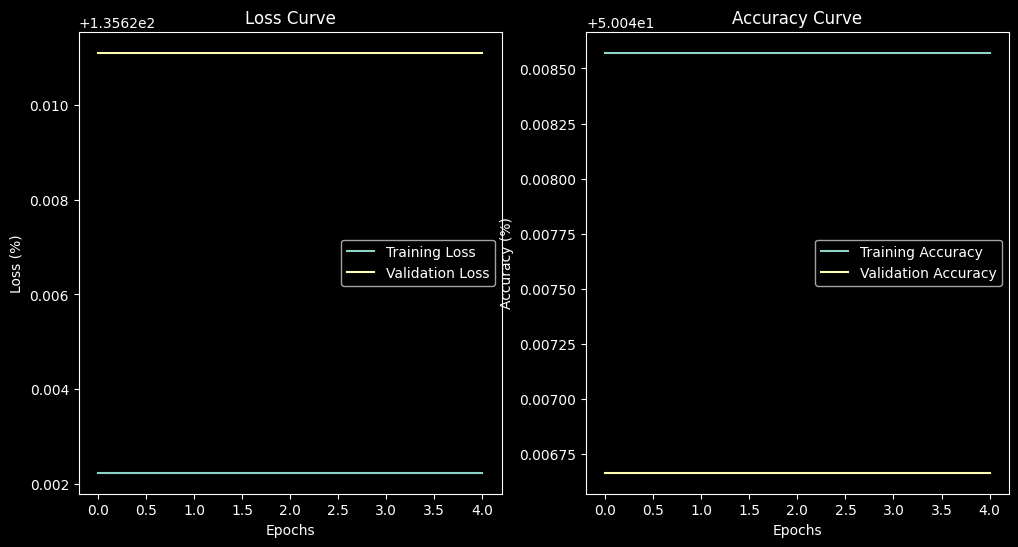

In [18]:
# Plotting loss and accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()